# Imports and function definitions

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_case_storage="C://Users//Antoine//Documents//Ecole des Ponts//Cours 3A//Oliver Wymann//stored_data_case.h5"
new_data_path = 'C://Users//Antoine//Documents//Ecole des Ponts//Cours 3A//Oliver Wymann//clean_data.h5'
parkmeter_storage="C://Users//Antoine//Documents//Ecole des Ponts//Cours 3A//Oliver Wymann//parkmeter_coords.h5"

In [2]:
def list_HDF_file(file_name):
    with pd.HDFStore(file_name, complevel=9, complib='blosc') as store:
        result = store.keys()   
    return result

def read_HDF_file(file_name, table):
    with pd.HDFStore(file_name, complevel=9, complib='blosc') as store:
        return store[table]

# Data reading and information extraction

In [3]:
# Extracting the clean data
df = read_HDF_file(new_data_path,"/transaction_and_locations")

In [4]:
# Extracting the data for a typical week
parking_counts_data = read_HDF_file(data_case_storage,"/parking_counts")

In [5]:
# Extracting the parkmeter coordinates and deleting the duplicates
parkmeter_data = read_HDF_file(parkmeter_storage,"/parkmeter_coordinates")

In [57]:
#parkmeter_data = parkmeter_data[parkmeter_data['parkmeter_id'] < 200000]

print(parkmeter_data)

      parkmeter_id         parkmeter_coordinates    amount
0            20301  48.8541990002, 2.33470999949  11135.68
1            40102      48.830383, 2.31482099952   5087.55
2            40202  48.8296970003, 2.31620000015   3663.65
3            40401       48.82884, 2.31826000035   6222.35
4            40405  48.8278949997, 2.32043099983  15185.06
5            60102  48.8433079999, 2.34211300028  12546.34
6            60202  48.8438679998, 2.33969899934   2135.62
7            80101  48.8570260003, 2.28092100068   6089.97
8           100402  48.8472750003, 2.32566599991  15695.36
9           120104  48.8426530004, 2.29379500058   2597.80
10          120201  48.8417590001, 2.29480300053   5786.91
11          120204  48.8413179998, 2.29495799938   6174.21
12          120302  48.8400059998, 2.29610099956   5478.91
13          120501  48.8392820001, 2.29717500047   3825.00
14          120601  48.8384990001, 2.29825900055   3047.65
15          120702  48.8381139997, 2.29867299968   3769.

In [23]:
# Printing stuff
# print(type(parkmeter_coordinates))
# print(parkmeter_coordinates.shape)
# print(parkmeter_coordinates.head(10))

# Transforms them into a proper array
parkmeter_number = len(parkmeter_data['parkmeter_coordinates'])
parkmeter_coords_list = [np.fromstring(parkmeter_data['parkmeter_coordinates'][idx], dtype=np.float64, sep=", ") 
                         for idx in range(parkmeter_number)]
parkmeter_amount_list = [(parkmeter_data['amount'][idx])
                         for idx in range(parkmeter_number)]
swapped_coords = np.column_stack((np.array(parkmeter_coords_list), np.array(parkmeter_amount_list)))

coords = np.zeros(swapped_coords.shape)
coords[:, 0], coords[:, 1] = swapped_coords[:, 1], swapped_coords[:, 0]
coords[:, 2] = swapped_coords[:, 2]

# Some printings

In [23]:
print("Total number of parkmeters : " + str(len(parkmeter_data['parkmeter_coordinates'])))

Total number of parkmeters : 7805


In [24]:
x_min, x_max = coords[:, 0].min(), coords[:, 0].max()
y_min, y_max = coords[:, 1].min(), coords[:, 1].max()

# Plot of the parkmeters repartition

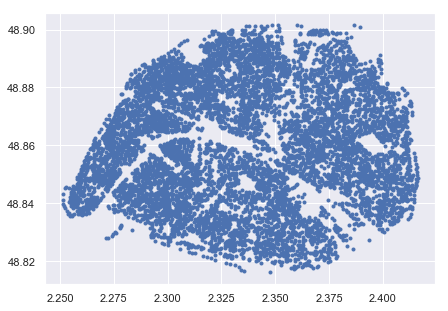

In [61]:
plt.subplots(figsize=(7, 5))
sns.set(style="darkgrid")
plt.plot(coords[:, 0], coords[:, 1], 'b.')
plt.show()

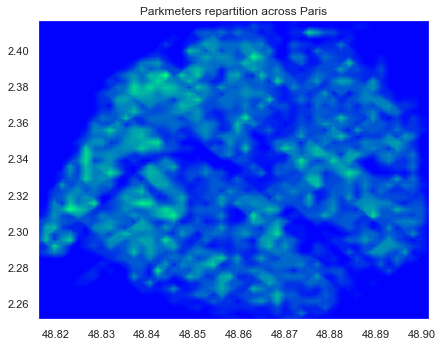

In [62]:
# Representing the repartition of the parkmeters across the map
grid_param = 50
x_step = (x_max - x_min)/(grid_param-1)
y_step = (y_max - y_min)/(grid_param-1)

x_mesh = np.linspace(x_min, x_max, num=grid_param);
y_mesh = np.linspace(y_min, y_max, num=grid_param);
parkmeter_repartition = np.zeros((grid_param, grid_param))
for i in range(coords.shape[0]):
    x_idx = int((coords[i, 0] - x_min)/x_step)
    y_idx = int((coords[i, 1] - y_min)/y_step)
    parkmeter_repartition[x_idx, y_idx] += 1


X, Y = np.meshgrid(x_mesh, y_mesh)
Z = parkmeter_repartition

# Don't ask me why Y comes before X, cause I'll answer you "yes"
plt.subplots(figsize=(7, 5.5))
plt.contourf(Y, X, Z, 50, cmap='winter')
#plt.colorbar()
plt.title("Parkmeters repartition across Paris")
plt.show()

# Plot of the parkmeter earnings

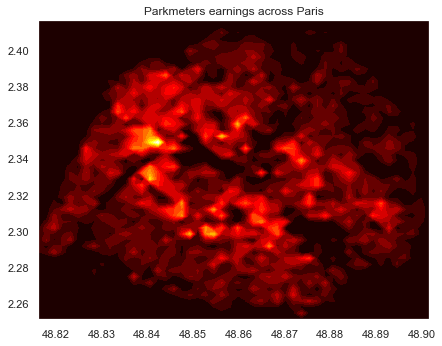

In [64]:
# Representing the repartition of the parkmeters across the map
grid_param = 50
x_step = (x_max - x_min)/(grid_param-1)
y_step = (y_max - y_min)/(grid_param-1)

x_mesh = np.linspace(x_min, x_max, num=grid_param);
y_mesh = np.linspace(y_min, y_max, num=grid_param);
parkmeter_repartition = np.zeros((grid_param, grid_param))
for i in range(coords.shape[0]):
    x_idx = int((coords[i, 0] - x_min)/x_step)
    y_idx = int((coords[i, 1] - y_min)/y_step)
    parkmeter_repartition[x_idx, y_idx] += coords[i, 2]


X, Y = np.meshgrid(x_mesh, y_mesh)
Z = parkmeter_repartition

# Don't ask me why Y comes before X, cause I'll answer you "yes"
plt.subplots(figsize=(7, 5.5))
plt.contourf(Y, X, Z, 20, cmap='hot')
#plt.colorbar()
plt.title("Parkmeters earnings across Paris")
plt.show()

# Plot of the demand

In [6]:
parking_counts_join_data = parking_counts_data.join(parkmeter_data.set_index('parkmeter_id'), on='parkmeter')
parking_counts_join_data = parking_counts_join_data.drop(["amount"], axis=1)

In [7]:
median_count = parking_counts_join_data.groupby(['parkmeter_coordinates', 'weekday', 'hour'])['count'].median()
count_frame = median_count.to_frame()
count_frame.reset_index(inplace=True)

In [27]:
weekday = "Monday"
hour = 12
sliced_count = count_frame[(count_frame["weekday"]==weekday) & (count_frame["hour"]==hour)]

In [29]:
parkmeter_number = len(sliced_count)
parkmeter_coords_list = [np.fromstring(sliced_count['parkmeter_coordinates'].iloc[idx], dtype=np.float64, sep=", ") 
                         for idx in range(parkmeter_number)]
parkmeter_amount_list = [(sliced_count['count'].iloc[idx])
                         for idx in range(parkmeter_number)]
swapped_coords = np.column_stack((np.array(parkmeter_coords_list), np.array(parkmeter_amount_list)))

coords = np.zeros(swapped_coords.shape)
coords[:, 0], coords[:, 1] = swapped_coords[:, 1], swapped_coords[:, 0]
coords[:, 2] = swapped_coords[:, 2]

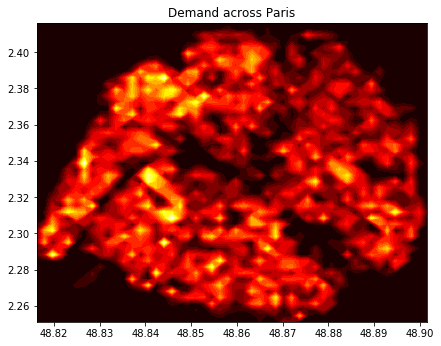

In [30]:
# Representing the repartition of the parkmeters across the map
grid_param = 50
x_step = (x_max - x_min)/(grid_param-1)
y_step = (y_max - y_min)/(grid_param-1)

x_mesh = np.linspace(x_min, x_max, num=grid_param);
y_mesh = np.linspace(y_min, y_max, num=grid_param);
parkmeter_repartition = np.zeros((grid_param, grid_param))
for i in range(coords.shape[0]):
    x_idx = int((coords[i, 0] - x_min)/x_step)
    y_idx = int((coords[i, 1] - y_min)/y_step)
    parkmeter_repartition[x_idx, y_idx] += coords[i, 2]


X, Y = np.meshgrid(x_mesh, y_mesh)
Z = parkmeter_repartition

# Don't ask me why Y comes before X, cause I'll answer you "yes"
plt.subplots(figsize=(7, 5.5))
plt.contourf(Y, X, Z, 20, cmap='hot')
#plt.colorbar()
plt.title("Demand across Paris")
plt.show()